In [1]:
from lotteries.probabilities import vong_example_1
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sympy import divisors
from collections import defaultdict

In [2]:
v_probability = np.vectorize(probability)

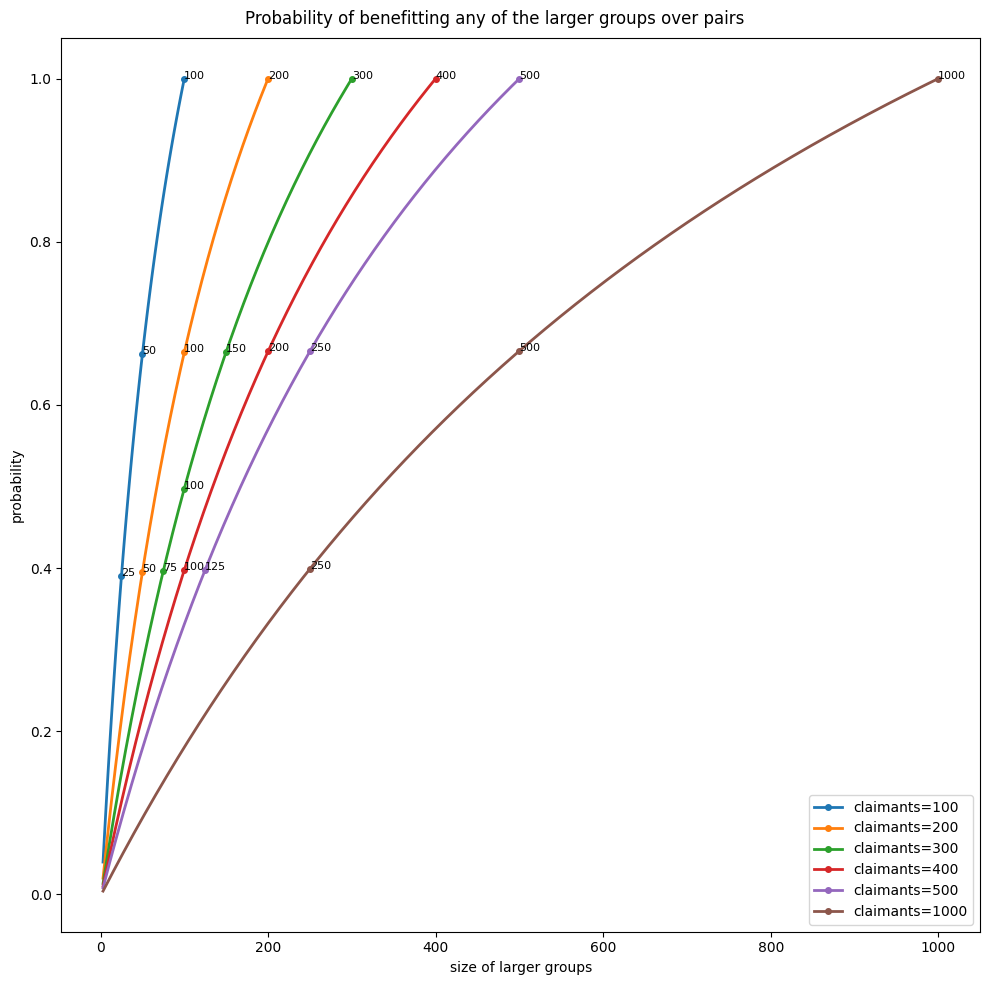

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("Probability of benefitting any of the larger groups over pairs")
ax.set_xlabel("size of larger groups")
ax.set_ylabel("probability")
all_claimants = [100, 200, 300, 400, 500, 1000]
for claimants in all_claimants:
    x = np.linspace(3, claimants, claimants - 2)
    temp_divisors = [x for x in divisors(claimants) if x>claimants/5]
    markers_on = np.searchsorted(x, temp_divisors)
    ax.plot(x, v_probability(claimants, x), label=f"{claimants=}",linewidth=2, marker= 'o', markersize=4, markevery=markers_on)
    for x_temp, y_temp in zip(x[markers_on], v_probability(claimants, x[markers_on])):
        ax.text(x_temp, y_temp,f'{x_temp:.0f}', fontsize = 8)
fig.tight_layout()
ax.legend();


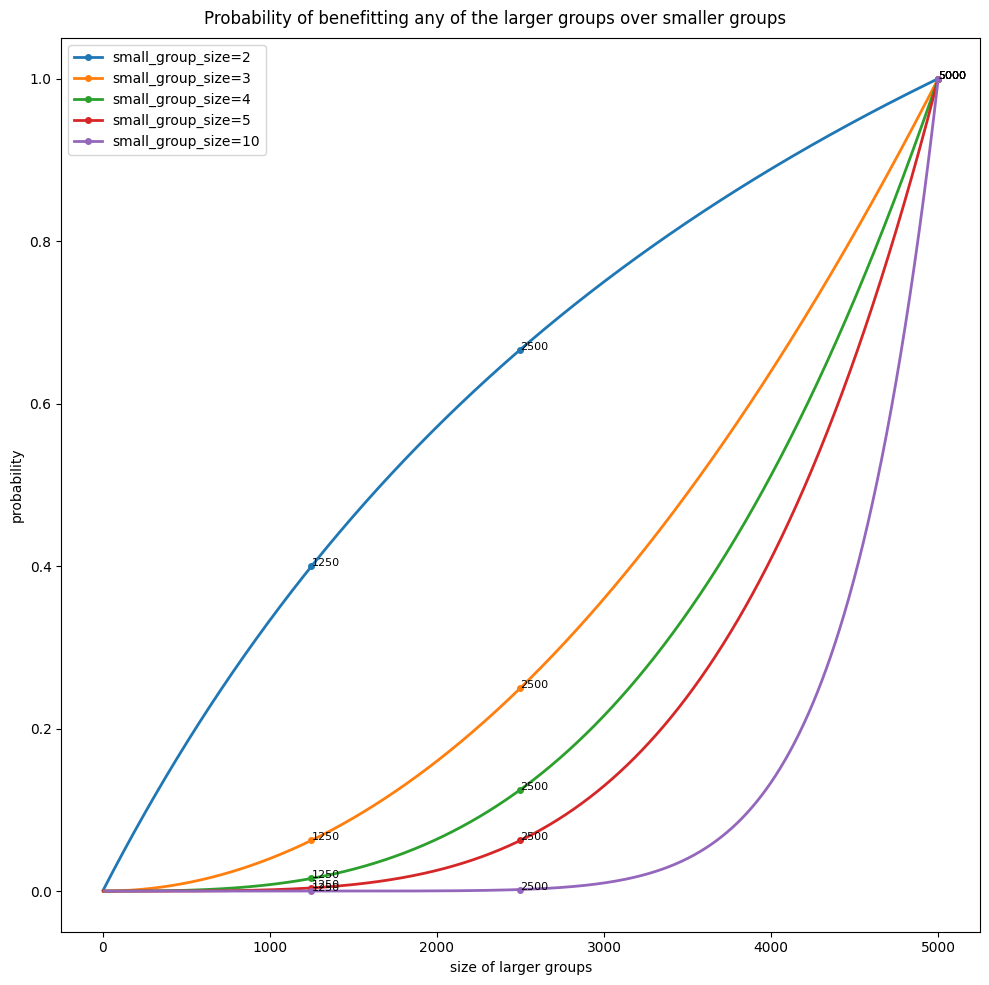

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("Probability of benefitting any of the larger groups over smaller groups")
ax.set_xlabel("size of larger groups")
ax.set_ylabel("probability")
claimants = 5000
for small_group_size in [2, 3, 4, 5, 10]:
    x = np.linspace(small_group_size + 1, claimants, claimants + 1 -(small_group_size + 1))
    temp_divisors = [x for x in divisors(claimants) if x>claimants/5]
    markers_on = np.searchsorted(x, temp_divisors)
    ax.plot(x, v_probability(claimants, x, group_size_fine = small_group_size), label=f"{small_group_size=}",linewidth=2, marker= 'o', markersize=4, markevery=markers_on)
    for x_temp, y_temp in zip(x[markers_on], v_probability(claimants, x[markers_on], group_size_fine = small_group_size)):
        ax.text(x_temp, y_temp,f'{x_temp:.0f}', fontsize = 8)
fig.tight_layout()
ax.legend();

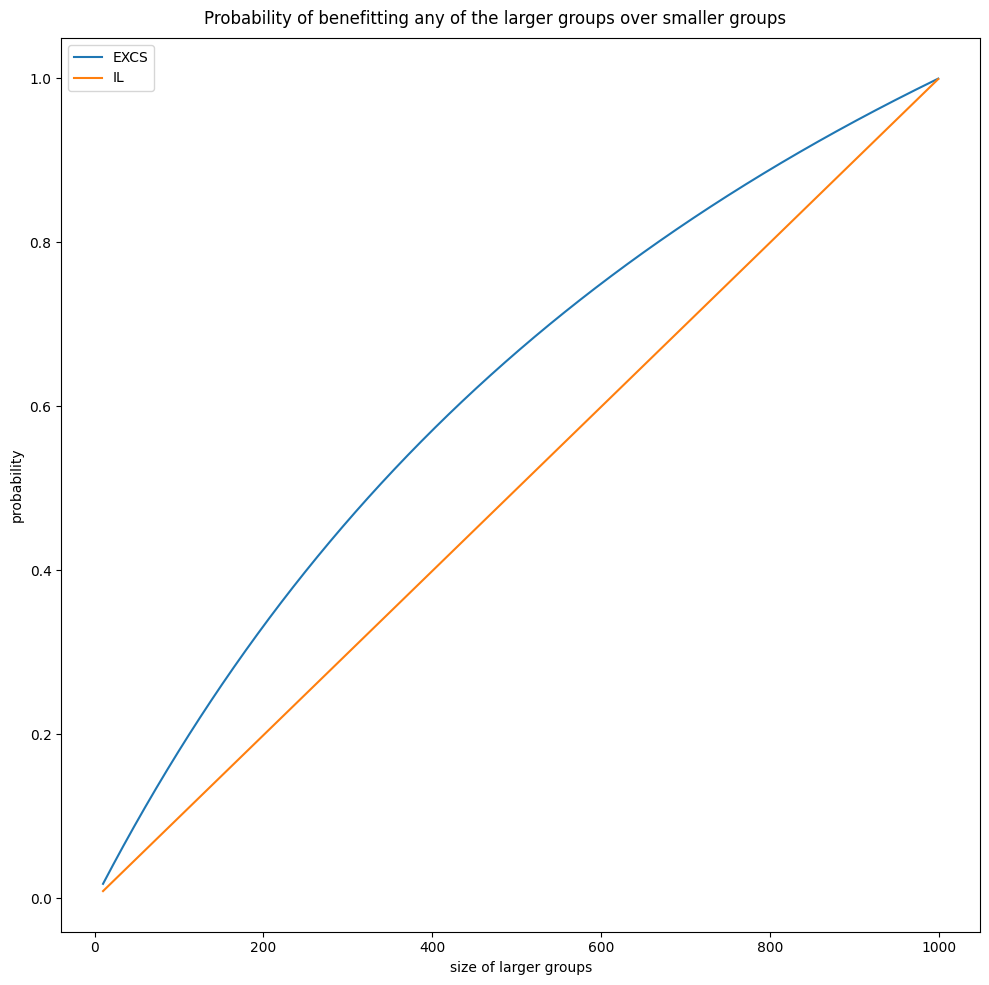

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("Probability of benefitting any of the larger groups over smaller groups")
ax.set_xlabel("size of larger groups")
ax.set_ylabel("probability")
claimants = 1000
small_group_size = 2
x = range(10,claimants)
ax.plot(list(x), [vong_example_1(claimants, group_size_coarse=large_group_size, group_size_fine = small_group_size) for large_group_size in x], label=f"EXCS")
ax.plot(list(x), [vong_example_1(claimants, group_size_coarse=large_group_size, group_size_fine = small_group_size, lottery='IL') for large_group_size in x], label=f"IL")
fig.tight_layout()
ax.legend();